In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
flightsDf = pd.read_csv('/content/flight-data.csv')
flightsDf.head()

,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,type,manufacturer,model,engines,seats,engine,arr_delay
0,B6,1201,N643JB,JFK,FLL,135.0,1069,21,50,73.04,66.92,81.14,160.0,13.80936,19.56326,0.0,1019.4,10.0,Fixed wing multi engine,AIRBUS,A320-232,2.0,200.0,Turbo-fan,1.0
1,DL,1773,N3743H,JFK,LAS,287.0,2248,15,35,71.06,42.98,36.28,230.0,14.96014,NaN,0.0,1020.4,10.0,Fixed wing multi engine,BOEING,737-832,2.0,189.0,Turbo-jet,0.0
2,EV,4572,N11107,EWR,GSP,84.0,594,15,9,78.80,69.80,73.95,200.0,8.05546,NaN,0.0,NaN,5.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2.0,55.0,Turbo-fan,1.0
3,B6,179,N526JB,JFK,PHX,305.0,2153,17,35,44.06,14.00,29.23,270.0,17.26170,24.16638,0.0,1009.2,10.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,US,1733,N162UW,LGA,CLT,78.0,544,7,53,69.98,53.96,56.78,230.0,6.90468,NaN,0.0,1021.3,10.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A321-211,2.0,199.0,Turbo-jet,0.0


In [3]:
flightsDf.wind_dir.value_counts()

310.0    520
260.0    414
180.0    413
230.0    409
0.0      395
320.0    392
300.0    391
190.0    372
330.0    347
270.0    332
50.0     328
240.0    326
220.0    318
280.0    310
250.0    297
290.0    289
40.0     284
170.0    283
210.0    249
340.0    238
360.0    231
200.0    229
60.0     228
20.0     218
350.0    198
160.0    193
140.0    188
10.0     188
150.0    169
30.0     159
100.0    133
70.0     122
120.0    117
90.0     116
80.0     114
130.0    114
110.0    107
Name: wind_dir, dtype: int64

In [4]:
flightsDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carrier       10000 non-null  object 
 1   flight        10000 non-null  int64  
 2   tailnum       9926 non-null   object 
 3   origin        10000 non-null  object 
 4   dest          10000 non-null  object 
 5   air_time      9716 non-null   float64
 6   distance      10000 non-null  int64  
 7   hour          10000 non-null  int64  
 8   minute        10000 non-null  int64  
 9   temp          9952 non-null   float64
 10  dewp          9952 non-null   float64
 11  humid         9952 non-null   float64
 12  wind_dir      9731 non-null   float64
 13  wind_speed    9951 non-null   float64
 14  wind_gust     2387 non-null   float64
 15  precip        9954 non-null   float64
 16  pressure      8808 non-null   float64
 17  visib         9954 non-null   float64
 18  type          8499 non-null

In [5]:
flightsDf.describe().T

,count,mean,std,min,25%,50%,75%,max
flight,10000.0,1993.785200,1637.565161,1.00000,580.75000,1511.00000,3514.25000,6181.00000
air_time,9716.0,149.771099,92.714630,21.00000,81.00000,130.00000,191.00000,648.00000
distance,10000.0,1033.036700,722.747763,80.00000,502.00000,872.00000,1389.00000,4983.00000
hour,10000.0,13.185300,4.691094,5.00000,9.00000,13.00000,17.00000,23.00000
minute,10000.0,26.405800,19.286677,0.00000,9.00000,29.00000,45.00000,59.00000
temp,9952.0,56.885289,17.967138,10.94000,42.08000,57.02000,71.96000,100.04000
dewp,9952.0,41.578652,19.360524,-9.04000,26.06000,42.80000,57.92000,78.08000
humid,9952.0,59.699401,19.713338,12.74000,43.92000,57.99000,75.69000,100.00000
wind_dir,9731.0,199.824273,106.234823,0.00000,120.00000,220.00000,290.00000,360.00000
wind_speed,9951.0,11.082228,5.635370,0.00000,6.90468,10.35702,14.96014,42.57886


In [6]:
flightsDf.columns

Index(['carrier', 'flight', 'tailnum', 'origin', 'dest', 'air_time',
       'distance', 'hour', 'minute', 'temp', 'dewp', 'humid', 'wind_dir',
       'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib', 'type',
       'manufacturer', 'model', 'engines', 'seats', 'engine', 'arr_delay'],
      dtype='object')

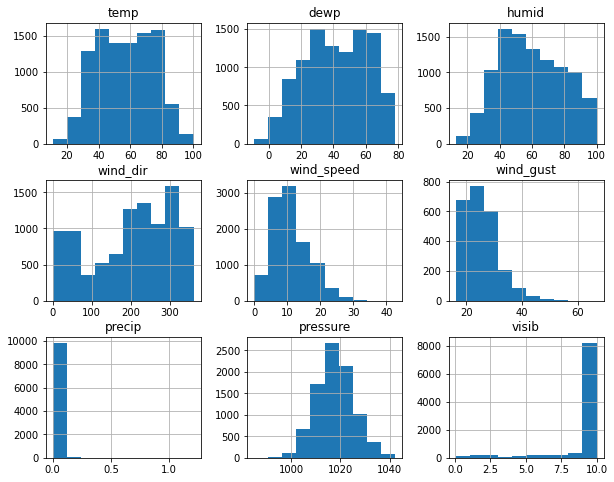

In [7]:
flightsDf[['temp', 'dewp', 'humid', 'wind_dir',
       'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib']].hist(figsize=(10,8))
plt.show()

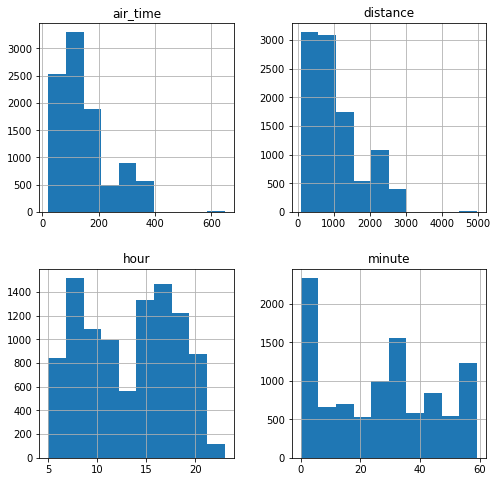

In [8]:
flightsDf[['air_time','distance', 'hour', 'minute']].hist(figsize=(8,8))
plt.show()

In [9]:
flightsDf[['type','manufacturer', 'model', 'engines', 'seats', 'engine']].isna().sum()

type            1501
manufacturer    1501
model           1501
engines         1501
seats           1501
engine          1501
dtype: int64

In [10]:
cols1 = ['type', 'engines', 'engine']
for i in cols1:
  print('\n Column name: ',i)
  print('Unique values: ',flightsDf[i].unique())


 Column name:  type
Unique values:  ['Fixed wing multi engine' nan 'Fixed wing single engine' 'Rotorcraft']

 Column name:  engines
Unique values:  [ 2. nan  1.  4.]

 Column name:  engine
Unique values:  ['Turbo-fan' 'Turbo-jet' nan 'Reciprocating' 'Turbo-shaft' 'Turbo-prop'
 '4 Cycle']


In [11]:
flightsDf['arr_delay'].value_counts()

0.0    5732
1.0    3984
Name: arr_delay, dtype: int64

In [12]:
flightsDf['arr_delay'].unique()

array([ 1.,  0., nan])

In [13]:
flightsDfUnLabeled = flightsDf[flightsDf['arr_delay'].isnull()]
flightsDfUnLabeled.shape

(284, 25)

In [14]:
flightsDfLabeled= flightsDf[flightsDf['arr_delay'].notnull()]
flightsDfLabeled.shape

(9716, 25)

In [15]:
flightsDf['carrier'].value_counts()

UA    1729
EV    1635
B6    1615
DL    1440
AA     951
MQ     758
US     630
9E     580
WN     372
VX     131
FL      91
YV      21
F9      18
AS      18
HA      10
OO       1
Name: carrier, dtype: int64

In [16]:
! pip install siuba

     |████████████████████████████████| 112 kB 5.3 MB/s 


In [17]:
from siuba.dply.forcats import fct_lump, fct_reorder 


flightsDf['carrierLumped'] = fct_lump(flightsDf['carrier'], n= 5)

flightsDf['carrierLumped'].value_counts()

Other    2630
UA       1729
EV       1635
B6       1615
DL       1440
AA        951
Name: carrierLumped, dtype: int64

In [18]:
flightsDf['dest'].value_counts()

ATL    518
BOS    487
LAX    462
ORD    461
CLT    412
      ... 
EYW      1
HDN      1
PSP      1
MTJ      1
ILM      1
Name: dest, Length: 101, dtype: int64

In [19]:
flightsDf.columns

Index(['carrier', 'flight', 'tailnum', 'origin', 'dest', 'air_time',
       'distance', 'hour', 'minute', 'temp', 'dewp', 'humid', 'wind_dir',
       'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib', 'type',
       'manufacturer', 'model', 'engines', 'seats', 'engine', 'arr_delay',
       'carrierLumped'],
      dtype='object')

In [20]:
flightsDfLabeled['carrierLumped'] = fct_lump(flightsDfLabeled['carrier'], n= 5)
flightsDfLabeled.drop(columns=['tailnum','origin', 'dest','manufacturer', 'model','seats','carrier','flight'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
flightsDfLabeled.head()

,air_time,distance,hour,minute,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,type,engines,engine,arr_delay,carrierLumped
0,135.0,1069,21,50,73.04,66.92,81.14,160.0,13.80936,19.56326,0.0,1019.4,10.0,Fixed wing multi engine,2.0,Turbo-fan,1.0,B6
1,287.0,2248,15,35,71.06,42.98,36.28,230.0,14.96014,NaN,0.0,1020.4,10.0,Fixed wing multi engine,2.0,Turbo-jet,0.0,DL
2,84.0,594,15,9,78.80,69.80,73.95,200.0,8.05546,NaN,0.0,NaN,5.0,Fixed wing multi engine,2.0,Turbo-fan,1.0,EV
3,305.0,2153,17,35,44.06,14.00,29.23,270.0,17.26170,24.16638,0.0,1009.2,10.0,NaN,NaN,NaN,1.0,B6
4,78.0,544,7,53,69.98,53.96,56.78,230.0,6.90468,NaN,0.0,1021.3,10.0,Fixed wing multi engine,2.0,Turbo-jet,0.0,Other


## Hard Code for Value imputation

In [ ]:
flightsDfLabeled.isna().sum()

In [ ]:
tempMedian = np.median(flightsDfLabeled['temp'].dropna())
dewpMedian = np.median(flightsDfLabeled['dewp'].dropna())
humidMedian = np.median(flightsDfLabeled['humid'].dropna())
windSpeedMedian = np.median(flightsDfLabeled['wind_speed'].dropna())
pressureMedian = np.median(flightsDfLabeled['pressure'].dropna())
visibMedian = np.median(flightsDfLabeled['visib'].dropna())
precipZero = 0
windGust = 0
flightType = flightsDfLabeled['type'].value_counts().index[0]
enginesType = flightsDfLabeled['engines'].value_counts().index[0]
engineType = flightsDfLabeled['engine'].value_counts().index[0]
 
print(flightType,' ',enginesType,' ',engineType)

Fixed wing multi engine   2.0   Turbo-fan


In [ ]:
flightsDfLabeled.loc[flightsDfLabeled['temp'].isna(),'temp'] = tempMedian
flightsDfLabeled.loc[flightsDfLabeled['dewp'].isna(),'dewp'] = dewpMedian
flightsDfLabeled.loc[flightsDfLabeled['humid'].isna(),'humid'] = humidMedian
flightsDfLabeled.loc[flightsDfLabeled['wind_speed'].isna(),'wind_speed'] = windSpeedMedian
flightsDfLabeled.loc[flightsDfLabeled['pressure'].isna(),'pressure'] = pressureMedian
flightsDfLabeled.loc[flightsDfLabeled['visib'].isna(),'visib'] =visibMedian
flightsDfLabeled.loc[flightsDfLabeled['precip'].isna(),'precip'] = precipZero
flightsDfLabeled.loc[flightsDfLabeled['wind_gust'].isna(),'wind_gust'] = windGust

flightsDfLabeled.loc[flightsDfLabeled['type'].isna(),'type'] =flightType
flightsDfLabeled.loc[flightsDfLabeled['engines'].isna(),'engines'] = enginesType
flightsDfLabeled.loc[flightsDfLabeled['engine'].isna(),'engine'] = engineType

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [118]:
flightsDfLabeled = pd.get_dummies(data=flightsDfLabeled, columns=['carrierLumped','engine','engines','type'])
flightsDfLabeled.head()

,air_time,distance,hour,minute,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,arr_delay,carrierLumped_Other,carrierLumped_AA,carrierLumped_B6,carrierLumped_DL,carrierLumped_EV,carrierLumped_UA,engine_4 Cycle,engine_Reciprocating,engine_Turbo-fan,engine_Turbo-jet,engine_Turbo-prop,engine_Turbo-shaft,engines_1.0,engines_2.0,engines_4.0,type_Fixed wing multi engine,type_Fixed wing single engine,type_Rotorcraft
0,135.0,1069,21,50,73.04,66.92,81.14,160.0,13.80936,19.56326,0.0,1019.4,10.0,1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1,287.0,2248,15,35,71.06,42.98,36.28,230.0,14.96014,0.00000,0.0,1020.4,10.0,0.0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,84.0,594,15,9,78.80,69.80,73.95,200.0,8.05546,0.00000,0.0,1017.6,5.0,1.0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
3,305.0,2153,17,35,44.06,14.00,29.23,270.0,17.26170,24.16638,0.0,1009.2,10.0,1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
4,78.0,544,7,53,69.98,53.96,56.78,230.0,6.90468,0.00000,0.0,1021.3,10.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0


In [119]:
#Train_Test_Split
from sklearn.model_selection import train_test_split
X = flightsDfLabeled[[x for x in flightsDfLabeled.columns if x != 'arr_delay']]
y=  flightsDfLabeled['arr_delay']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)
print('Training samples: ',X_train.shape[0])
print('Testing samples: ',X_test.shape[0])

Training samples:  7287
Testing samples:  2429


## Value Imputation

## LogisticRegression | DecisionTree | SVM GridSearch

In [109]:
flightsDfLabeled.isna().sum()

air_time           0
distance           0
hour               0
minute             0
temp               0
dewp               0
humid              0
wind_dir         265
wind_speed         0
wind_gust          0
precip             0
pressure           0
visib              0
type               0
engines            0
engine             0
arr_delay          0
carrierLumped      0
dtype: int64

In [149]:
#clean
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

classifier1 = LogisticRegression(penalty='l2',C=0.01,solver='lbfgs')
classifier2 = DecisionTreeClassifier(criterion='entropy', max_depth=2)
classifier3 = SVC(kernel='rbf',C=1, gamma='auto')


pipe1 = Pipeline([('SSc1',StandardScaler()),('Logreg', classifier1)])
pipe2 = Pipeline([('SSc2',StandardScaler()),('DecT', classifier2)])
pipe3 = Pipeline([('SSc3', StandardScaler()),('Svc', classifier3)])

# score = cross_val_score(estimator=pipe1,X=X_train.drop(columns=['wind_dir'],axis=1), y=y_train, scoring='roc_auc', cv=10)
# score


labs = ['LogisticRegression', 'DecisionTree', 'SupportVectorMachine']
pipes = [pipe1, pipe2, pipe3]
clfs= zip(labs,clfs)

for pipe in pipes:
  scores = cross_val_score(estimator=pipe, X=X_train.drop(columns=['wind_dir'],axis=1), y=y_train, cv=10, scoring='accuracy')
  print(f'Accuracy {scores.mean():.2f} (+/- {scores.std():.2f})')

Accuracy 0.64 (+/- 0.02)
Accuracy 0.64 (+/- 0.01)
Accuracy 0.66 (+/- 0.02)


__The order of the models: 1.) Logistic Regression, 2.) Decision Tree, 3.) Support Vector Machine__

Here the SVM gave a good accuracy score with the less amount of deviation, so we can consider it the best model out of three in terms of accuracy.

On the other hand for Decision tree, we have accuracy of 64% just 2% less than SVM but the minimum deviation and less computation.

We should prefer Decision Tree over other two models



## Ensemble

In [152]:
from sklearn.ensemble import VotingClassifier

ems = [('lr', pipe1),('dt', pipe2),('svc', pipe3)]
classifier4 = VotingClassifier(estimators= ems, voting='hard')

scores = cross_val_score(estimator=classifier4, X=X_train.drop(columns=['wind_dir'],axis=1), y=y_train, scoring='accuracy')
print(f'Accuracy {scores.mean():.2f} (+/- {scores.std():.2f}) [Ensemble]')

Accuracy 0.65 (+/- 0.00) [Ensemble]


With Ensemble the accuracy is increased and deviation is zero. The increment of accuracy is not that good to be considered. So still Decision Tree is preferable model.

We can confirm with the requirements of the client whether bearing the deviation matters over the accuracy or not.

## GridSearch on Ensemble


In [159]:
from sklearn.model_selection import GridSearchCV

parameters= {'lr__Logreg__C':[0.001, 0.1, 1, 10], 'dt__DecT__max_depth': [1,2,3], 'svc__Svc__kernel': ['rbf','linear']}

gridSearch = GridSearchCV(estimator=classifier4, param_grid=parameters, scoring='accuracy', refit=True)
gridSearch.fit(X_train.drop(columns=['wind_dir'], axis=1), y_train)

scoreTest = gridSearch.score(X_test.drop(columns=['wind_dir'], axis=1), y_test)
scoreTrain = gridSearch.score(X_train.drop(columns=['wind_dir'], axis=1), y_train)

print('Grid Search TestScore: ', np.round(scoreTest, 2))
print('Grid Search TrainScore: ', np.round(scoreTrain, 2))



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Grid Search Score:  0.67


In [161]:
gridSearch.best_estimator_

VotingClassifier(estimators=[('lr',
                              Pipeline(memory=None,
                                       steps=[('SSc1',
                                               StandardScaler(copy=True,
                                                              with_mean=True,
                                                              with_std=True)),
                                              ('Logreg',
                                               LogisticRegression(C=10,
                                                                  class_weight=None,
                                                                  dual=False,
                                                                  fit_intercept=True,
                                                                  intercept_scaling=1,
                                                                  l1_ratio=None,
                                                                  max_iter=100,
 

In [162]:
scoreTest = gridSearch.score(X_test.drop(columns=['wind_dir'], axis=1), y_test)
scoreTrain = gridSearch.score(X_train.drop(columns=['wind_dir'], axis=1), y_train)

print('Grid Search TestScore: ', np.round(scoreTest, 2))
print('Grid Search TrainScore: ', np.round(scoreTrain, 2))

Grid Search TestScore:  0.67
Grid Search TrainScore:  0.69


Through GridSearch, we were able to increase the accuracy, the Decision Tree is not considered in the best estimator. 

## AdaBoost

In [165]:
# Stump Decision Tree
from sklearn.metrics import accuracy_score
tree = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1)
tree = tree.fit(X_train.drop(columns=['wind_dir'], axis=1), y_train)
tree_train_predict = tree.predict(X_train.drop(columns=['wind_dir'], axis=1))
tree_test_predict = tree.predict(X_test.drop(columns=['wind_dir'], axis=1))

tree_train_score = accuracy_score(y_train, tree_train_predict)
tree_test_score = accuracy_score(y_test, tree_test_predict)

print('Test Score: ', np.round(tree_test_score,2))
print('Train Score: ', np.round(tree_train_score,2))

Test Score:  0.58
Train Score:  0.59


In [168]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = tree, n_estimators=200, learning_rate=0.1, random_state=1)
ada = ada.fit(X_train.drop(columns=['wind_dir'], axis=1), y_train)

ada_train_predict = ada.predict(X_train.drop(columns=['wind_dir'], axis=1))
ada_test_predict = ada.predict(X_test.drop(columns=['wind_dir'], axis=1))

ada_train_score = accuracy_score(y_train, ada_train_predict)
ada_test_score = accuracy_score(y_test, ada_test_predict)

print('Test Score: ', np.round(ada_test_score,2))
print('Train Score: ', np.round(ada_train_score,2))


Test Score:  0.64
Train Score:  0.66


The accuracy has increased by ~7% also there is no significant difference between the test and training scores, so we can infer that there is no under-fitting or over-fitting by the ADABoost